## **Apple Stock Price Prediction**

Stock price prediction is a critical task in financial markets, offering valuable insights that can guide investment decisions, portfolio management, and risk assessment. Accurate predictions can lead to significant financial gains, while poor forecasts may result in substantial losses.

Traditional models often struggle to capture the complex and non-linear relationships present in stock market data. However, the advent of Machine Learning (ML) and Deep Learning techniques, particularly Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks, has opened new possibilities for improving prediction accuracy by effectively capturing temporal dependencies within the data.

In this notebook, the aim is to develop and evaluate two deep learning models—an RNN and an LSTM—for predicting the stock prices of Apple Inc. (AAPL). By leveraging historical stock price data, we will build models capable of forecasting future stock prices, providing valuable insights for financial decision-making.

### **Data Dictionary**

| **Column**    | **Description**                                                                 |
|---------------|---------------------------------------------------------------------------------|
| **Date**      | The date of the trading day.                                                    |
| **Open**      | The price of Apple Inc. (AAPL) stock at the beginning of the trading day.       |
| **High**      | The highest price of the stock during the trading day.                          |
| **Low**       | The lowest price of the stock during the trading day.                           |
| **Close**     | The price of the stock at the end of the trading day.                           |
| **Adj Close** | The adjusted closing price, accounting for any corporate actions like splits.   |
| **Volume**    | The total number of shares traded during the day.                               |

### **Target Feature**

The target feature for this stock price prediction task is the **"Adj Close"** price. The adjusted close price is used because it accounts for corporate actions such as stock splits or dividends, providing a more accurate reflection of the stock's value over time. This feature will be used to train the model to predict future stock prices.



In [1]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Tested on Python 3.8.10
!pip install tensorflow==2.17.0
!pip install statsmodels==0.14.0
!pip install numpy==1.25.2
!pip install scikit-learn==1.3.0
!pip install seaborn==0.12.2
!pip install matplotlib==3.7.2
!pip install pandas==2.0.3
!pip install yfinance==0.2.25
!pip install pandas_ta==0.3.14b0
!pip install pandas_datareader==0.10.0
!pip install projectpro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.4
    Uninstalling pyparsing-3.1.4:
      Successfully uninstalled pyparsing-3.1.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 97.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.43
    Uninstalling yfinance-0.2.43:
      Successfully uninstalled yfinance-0.2.43
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=5f1b14e15b1e43c652b3e6d318fa82feca40dd9215d

In [27]:
# Import necessary libraries and packages
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_ta as ta

import keras
import tensorflow as ts
from keras.layers import LSTM, SimpleRNN, Dense, Input
from keras.models import Sequential

import yfinance as yf
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from projectpro import model_snapshot, checkpoint

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Initial Setup
keras.backend.set_image_data_format('channels_last')
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
yf.pdr_override

<function yfinance.pdr_override()>

### Loading the Apple Inc. (AAPL) Stock Data

In this step, the historical stock price data for Apple Inc. (AAPL) is loaded from Yahoo Finance using the `yfinance` library. The data spans from January 1, 2012, to the current date. This dataset includes key information such as the opening, closing, highest, and lowest prices for each trading day, as well as the trading volume.

By utilizing the `yf.download` function, I can directly fetch this data and store it in a Pandas DataFrame named `df` for further analysis and model training.



In [4]:
# Load historical stock price data for Apple Inc. (AAPL)
df= yf.download('AAPL', start= '2012-01-01', end= datetime.now())

# Display the first few rows of the dataset
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402625,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469279,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607713,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739515,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719302,394024400


### Exploratory Data Analysis (EDA)

Before proceeding with the model training, it's essential to explore the data to confirm its integrity and understand its structure. Since the dataset is sourced from Yahoo Finance, it is expected to be clean, but a brief exploration will help verify this assumption and gain insights into the data trends.

1. **Summary Statistics**: Generate summary statistics to understand the distribution of the features.
2. **Missing Values**: Check for any missing data in the dataset.
3. **Visualizing Trends**: Plot the Adjusted Close price over time to observe the overall trend.
4. **Correlation Analysis**: (Optional) Generate a correlation matrix to examine the relationships between different features.


In [5]:
# Summary statistics of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3.186000e+03
mean,74.679417,75.477414,73.926159,74.734149,72.529289,1.847462e+08
std,61.402356,62.075717,60.787171,61.462094,61.934071,1.674606e+08
min,13.856071,14.271429,13.753571,13.947500,11.952168,2.404830e+07
25%,25.337501,25.562500,25.133125,25.355625,22.856857,8.229820e+07
50%,43.346251,43.711250,42.995001,43.286249,41.032915,1.247684e+08
75%,134.797501,136.004997,133.334999,134.667500,132.161659,2.221543e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,1.506120e+09


### Summary Statistics Analysis

The summary statistics provide a comprehensive overview of the key numerical features in the dataset:

- **Open, High, Low, Close, Adj Close**: These columns reflect the stock's price movements over time. The mean values of these prices indicate that the average trading price of Apple Inc. (AAPL) has been around $74-$75 over the period analyzed. The minimum and maximum values reveal that the stock has experienced significant price fluctuations, with a minimum close of approximately $13.95 and a maximum close of around $234.82.

- **Volume**: The trading volume has varied widely, with an average of around 184.7 million shares traded daily. The standard deviation indicates high variability in trading volume, ranging from a minimum of 24 million to a maximum of 1.5 billion shares traded in a single day.

- **Quartiles**: The 25th, 50th (median), and 75th percentiles show the distribution of stock prices and volume. For instance, 50% of the trading days had a closing price below $43.29, while the top 25% of trading days saw prices above $134.67.

These statistics highlight the overall trends and variability in Apple's stock price and trading volume, providing a foundation for further time-series analysis and model development.


In [6]:
# Check for missing values
missing_values= df.isna().sum()
print('Missing values in Dataset:')
missing_values

Missing values in Dataset:


,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


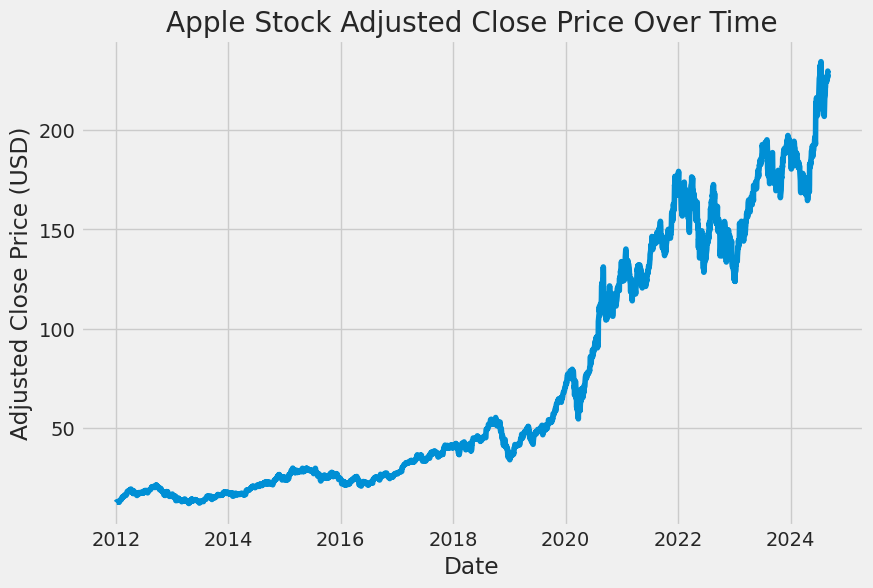

In [11]:
# 'Adj Close' plot over time
plt.figure(figsize= (9,6))
plt.plot(df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.title('Apple Stock Adjusted Close Price Over Time')
plt.show()

### Analysis of Apple Stock Adjusted Close Price Over Time

The plot above illustrates the adjusted close price of Apple Inc. (AAPL) from 2012 to 2024. The data reveals a significant upward trend in Apple's stock price over this period, especially from 2019 onwards. This increase reflects the company's growth and its strong market performance. Notable periods of volatility can be observed, particularly around 2020, likely corresponding to broader market events such as the COVID-19 pandemic. Overall, the plot highlights Apple's consistent long-term growth trajectory, making it a valuable asset for investors.


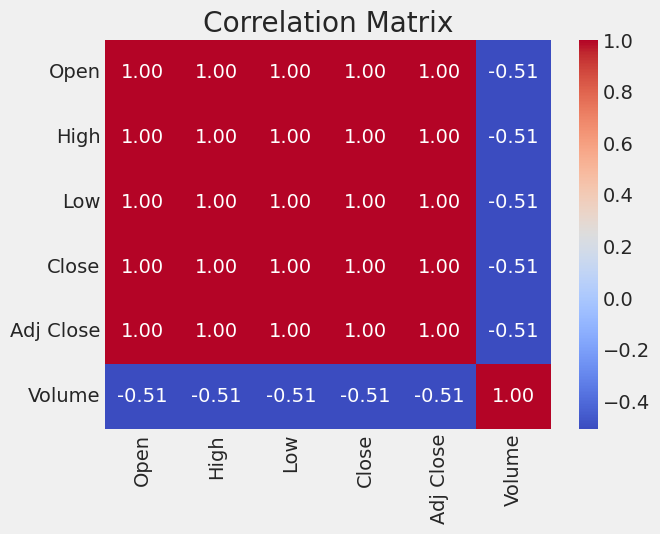

In [8]:
# Correlation Matrix
corr_matrix= df.corr()
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Correlation Matrix')
plt.show()

### Correlation Matrix Analysis

The correlation matrix above shows the Pearson correlation coefficients between the key numerical features in the Apple Inc. (AAPL) stock dataset:

- **Perfect Correlation among Prices**: The Open, High, Low, Close, and Adj Close prices all exhibit a perfect positive correlation (correlation coefficient = 1.00) with each other. This is expected as these price metrics are intrinsically linked, with the Close and Adj Close prices being particularly critical in stock price analysis.

- **Negative Correlation with Volume**: The Volume feature shows a moderate negative correlation (correlation coefficient = -0.51) with all price metrics (Open, High, Low, Close, and Adj Close). This suggests that as trading volume increases, the stock prices tend to decrease slightly, and vice versa. This inverse relationship is typical in financial markets, where higher trading volumes might occur during periods of price decline due to increased selling pressure.

- **Implications for Modeling**: The strong multicollinearity among the price features implies that they carry redundant information, which may affect the performance of certain machine learning models. The negative correlation between Volume and prices could be explored further, as it might provide insights into market behavior during periods of high trading activity.



In [12]:
# Define the training and testing periods
tstart= 2016
tend= 2020

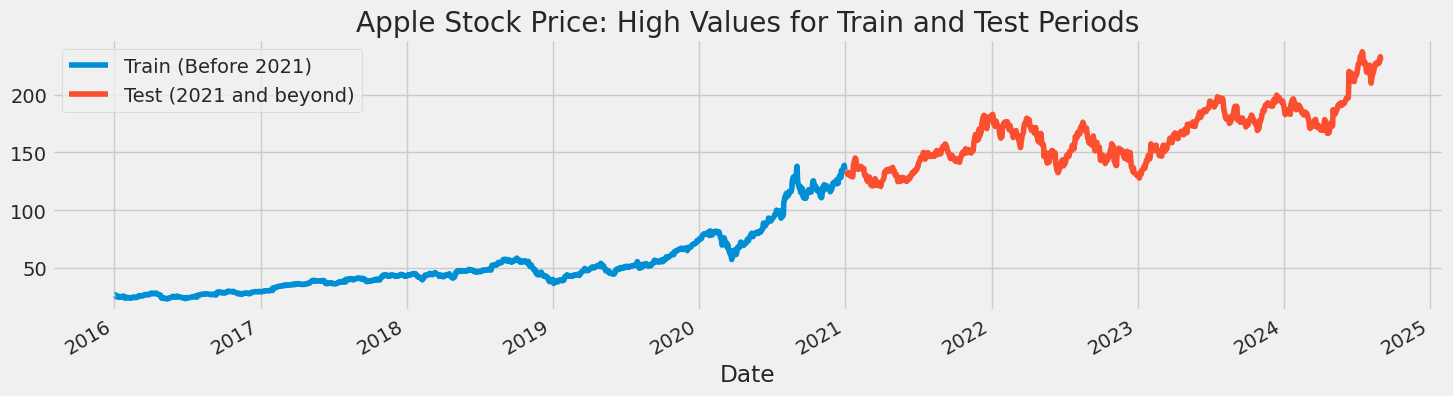

In [13]:
# Define a function to plot the training and testing data
def train_test_plot(df, tstart, tend):

  # Plot the 'High' prices for the training period
  df.loc[f'{tstart}':f'{tend}', 'High'].plot(figsize= (16,4), legend= True)

  # Plot the 'High' prices for the testing period
  df.loc[f'{tend+1}':, 'High'].plot(figsize= (16,4), legend= True)

  # Add a legend to differentiate between training and testing periods
  plt.legend([f'Train (Before {tend+1})', f'Test ({tend+1} and beyond)'])

  # Plot title
  plt.title('Apple Stock Price: High Values for Train and Test Periods')
  plt.show()

# Call the function
train_test_plot(df, tstart, tend)

### Analysis of Apple Stock Price: Train and Test Periods

The plot above shows the "High" prices of Apple Inc. (AAPL) stock, divided into training and testing periods:

- **Training Period (2016-2020)**: Represented by the blue line, this period shows a steady increase in Apple's stock price with some fluctuations, particularly around 2018-2019. This data will be used to train the model to recognize patterns and predict future prices.

- **Testing Period (2021 and Beyond)**: Represented by the red line, this period captures the stock price behavior after 2020. The testing period includes a significant rise in stock price, reflecting Apple's strong market performance in recent years. This data will be used to evaluate the model's accuracy in predicting unseen stock prices.

The clear distinction between the training and testing periods allows for a robust evaluation of the model's predictive capabilities. By ensuring that the testing period includes recent and volatile market conditions, a better assessmen of the model's ability to generalize and perform in real-world scenario can be executed.


### Splitting the Dataset and Scaling the Training Data

In the next steps, the dataset is split into training and testing sets based on the specified time periods (2016-2020 for training and 2021 and beyond for testing). The "High" prices are used as the target feature for this analysis.

After splitting the data, the training set is normalized using `MinMaxScaler` to scale the data between 0 and 1. This step is crucial for ensuring that the model can effectively learn from the data, as it prevents features with larger magnitudes from dominating the learning process.


In [16]:
# Define a function to split the data into training and testing sets
def train_test_split(df, tstart, tend, columns= ['High']):

  # Extract the training data based on the start and end time
  train= df.loc[f'{tstart}': f'{tend}', columns].values

  # Extract the testing data that comes after the training period
  test= df.loc[f'{tend+1}':, columns].values

  return train, test

# Apply the function to split the dataset
training_set, test_set= train_test_split(df, tstart, tend)

In [17]:
# Initialize the MinMaxScaler
sc= MinMaxScaler(feature_range= (0,1))

# Reshape the training data to ensure it's a 2D array (necessary for scaling)
training_set= training_set.reshape(-1,1)

# Apply the scaler to the training set
training_set_scaled= sc.fit_transform(training_set)

### Creating Overlapping Windows and Reshaping the Data

Next, the time series data is split into overlapping sequences to capture temporal dependencies. Each sequence consists of a defined number of steps (`n_steps`), which serve as the input for predicting the next value in the sequence.

After generating the sequences, the input data (`X_train`) is reshaped to fit the input requirements of RNNs and LSTMs. The reshaped data has three dimensions: the number of samples, the number of time steps, and the number of features.


In [18]:
# Define the number of time steps and features
n_steps= 1
features= 1

In [19]:
# Define a function to split the sequence into input (X) and output (y)
def split_sequence(sequence, n_steps):
  X, y= list(), list()
  for i in range(len(sequence)):

    # Define the end of the sequence
    end_ix= i + n_steps

    # If the end index goes beyond the end of the sequence, break the loop
    if end_ix > len(sequence) - 1:
      break

    # Split the sequence into intput and output pairs
    seq_x, seq_y= sequence[i:end_ix], sequence[end_ix]

    # Append to the respective lists
    X.append(seq_x)
    y.append(seq_y)

  return np.array(X), np.array(y)

# Apply the function to the scaled training set
X_train, y_train= split_sequence(training_set_scaled, n_steps)

In [20]:
# Reshape X_train for the model
X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], features))

### Evaluation: Plotting Predictions and Calculating RMSE

Two key evaluation steps are performed to assess the model's performance:

1. **Plotting Predictions**: A plot is generated to compare the actual test data with the model's predictions. This visual comparison helps in understanding how closely the model's predictions align with reality.

2. **Calculating RMSE**: The Root Mean Squared Error (RMSE) is calculated to quantify the average magnitude of the errors between the predicted and actual values. The RMSE is a standard metric in regression tasks, offering a clear measure of prediction accuracy.


In [33]:
# Define a function to plot real vs. predicted values
def plot_predictions(test, predicted, title):

  # Plot the actual test data
  plt.plot(test, color= 'gray', label= 'Real')

  # Plot the predicted data
  plt.plot(predicted, color= 'red', label= 'Predicted')

  # Plot labels
  plt.xlabel('Time')
  plt.ylabel(f'{title}')
  plt.title(f'{title}')
  plt.legend()
  plt.show()

In [22]:
# Define a function to calculate and print RMSE
def return_rmse(test, predicted):

  # Calculate the RMSE
  rmse= np.sqrt(mean_squared_error(test, predicted))

  # Print RMSE
  print('Root Mean Squared Error is: {:.2f}'.format(rmse))

### Model Training and Loss Plot

The  following model is a simple RNN with 125 units, followed by a Dense output layer. The model is compiled using the RMSprop optimizer and the Mean Squared Error (MSE) loss function. The model is trained for 10 epochs, with a batch size of 32.

After training, the loss over epochs is plotted to visualize the model's learning progress. This plot shows how the training loss decreases over time, indicating the model's performance improvement as it learns from the data.


In [23]:
# Define a function to plot the training loss
def plot_loss(history):
  plt.figure(figsize= (10,6))
  plt.plot(history.history['loss'], label= 'Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Model Training Loss')
  plt.legend(loc= 'best')
  plt.show()

In [28]:
# Building the RNN model
model_rnn= Sequential()
model_rnn.add(Input(shape= (n_steps, features)))
model_rnn.add(SimpleRNN(units= 125))
model_rnn.add(Dense(units= 1))

# Compling the model
model_rnn.compile(optimizer= 'RMSprop', loss= 'mse')

# Training the model
history= model_rnn.fit(X_train, y_train, epochs= 10, batch_size= 32, verbose= 0)

<IPython.core.display.Javascript object>

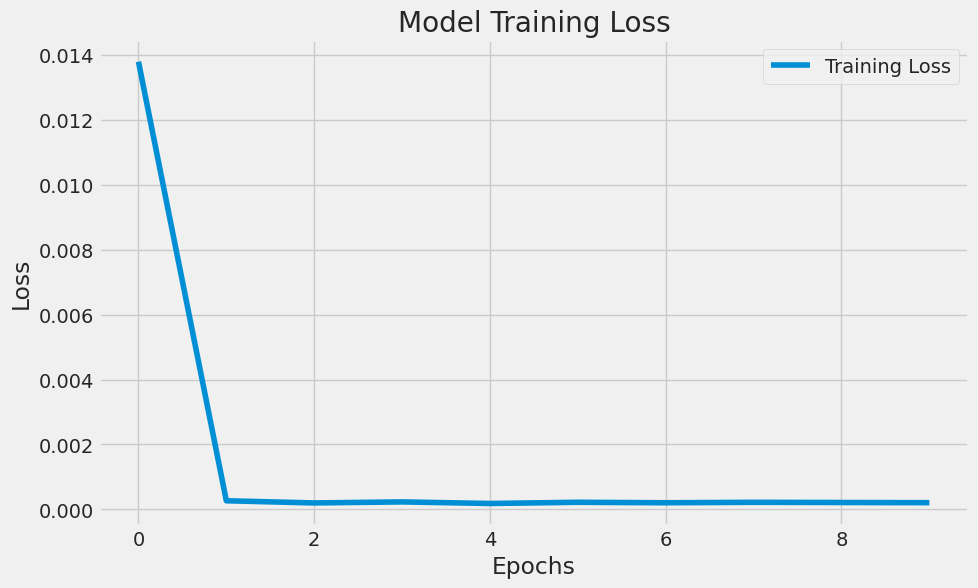

In [29]:
# Take a snapshot of the model
model_snapshot('34db30')

# Plot the training loss
plot_loss(history)

### Analysis of Model Training Loss

The plot above illustrates the training loss over 10 epochs for the Recurrent Neural Network (RNN) model:

1. **Initial High Loss**: The training loss starts relatively high in the first epoch. This is expected as the model begins to learn from the data and initially makes larger errors.

2. **Rapid Decrease in Loss**: There is a sharp decline in the training loss between the first and second epochs. This suggests that the model quickly learned the fundamental patterns in the data, reducing its error significantly in the early stages of training.

3. **Plateau**: After the initial drop, the training loss plateaus and remains close to zero for the remaining epochs. This indicates that the model has effectively minimized its error on the training data and has likely reached a point of convergence.

4. **Overfitting Potential**: The rapid decrease and low final loss could suggest that the model has a strong fit to the training data. However, this raises a concern about potential overfitting, where the model may perform well on the training data but might not generalize as effectively to unseen data.

Overall, the plot shows that the model was able to quickly learn from the training data, achieving minimal loss early in the training process.


### Time Series Prediction and Visualization

Next, the test data is scaled and split into sequences to be used as input for the trained RNN model. After making predictions, the predicted stock prices are scaled back to their original values. A plot is then generated to compare the actual stock prices with the model's predictions.

This process highlights the model's ability to forecast stock prices based on previous data, providing insights into its effectiveness in time series prediction tasks.


In [30]:
# Scaling the test set using the same scaler applied to the training set
inputs= sc.transform(test_set.reshape(-1,1))

# Split the scaled test data into input sequences and the corresponding true values
X_test, y_test= split_sequence(inputs, n_steps)

# Reshape the test data for prediction
X_test= X_test.reshape(-1, n_steps, features)

# Predict the stock prices using the rained RNN model
pred_stock_price= model_rnn.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


- Since the predictions were made on scaled data, they need to be converted back to the original scale to be meaningful. The `inverse_transform` method of the scaler is used for this purpose.

In [31]:
# Inverse transform the predicted stock prices to the original scale
pred_stock_price= sc.inverse_transform(pred_stock_price)

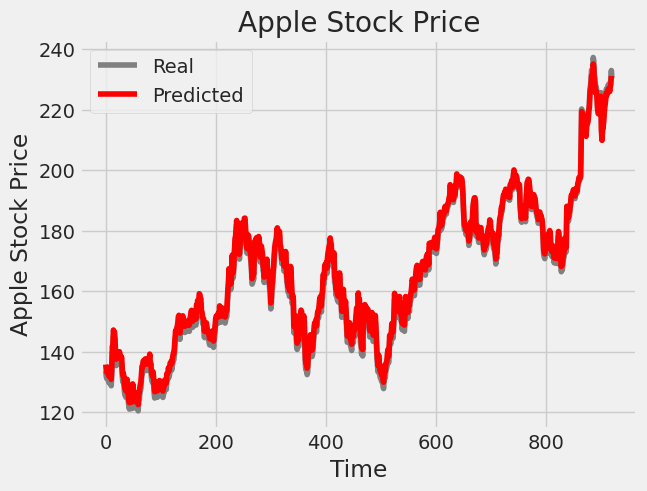

In [34]:
# Plot the actual vs. predicted stock price
plot_predictions(test_set, pred_stock_price, 'Apple Stock Price')

### Analysis of Apple Stock Price Predictions

The plot above shows a comparison between the **actual Apple stock prices** (in gray) and the **predicted stock prices** (in red) over a specific time period.

1. **Close Alignment Between Real and Predicted Values**:
    - The red line representing the predicted values closely follows the gray line, indicating that the model has done a good job of capturing the overall trend in the stock prices. This suggests that the model is able to predict future stock prices with a reasonable level of accuracy based on the historical data it was trained on.

2. **Model Performance**:
    - The model appears to perform well during periods of steady growth and decline, as the predicted values track closely with the real values. This is a positive indication that the model can handle typical market fluctuations.

3. **Handling of Volatility**:
    - The model also seems to handle periods of higher volatility reasonably well, as the predicted line still follows the overall movement of the actual prices. However, there are instances where the predicted prices slightly lag behind the real prices, particularly during sharp rises or drops. This could be due to the model's inherent smoothing effect, where it predicts a more conservative movement.

4. **Potential Noise Accumulation**:
    - The plot also highlights a challenge in time series forecasting known as **noise accumulation**. As predictions are made based on previous predictions (in the case of sequence generation), small errors can accumulate and propagate over time. This can lead to slight deviations from the actual values, especially over longer prediction horizons.

5. **Generalization**:
    - The close fit between the predicted and actual prices suggests that the model has successfully generalized from the training data to the test data, making it potentially useful for future predictions. However, further evaluation, including RMSE or other metrics, would provide a more quantitative measure of the model's performance.



### Sequence Generation for Future Predictions

In this step, the trained RNN model is used to predict Apple stock prices for the next 25 time steps. The sequence generation approach utilizes the model's previous predictions as inputs for generating future predictions, which is critical for forecasting in time series analysis.

The results are then compared to the actual stock prices, providing a visual representation of the model's performance in predicting future stock price movements. This method allows for an assessment of the model's capability to generalize and predict beyond the data it was originally trained on.


In [35]:
# Setting up parameters for sequence generation
steps_in_future= 25

In [36]:
# Define a function that generates a sequence of predicted values for the future times steps using the trained RNN model
def sequence_generation(dataset: pd.DataFrame, sc: MinMaxScaler, model: Sequential, steps_future: int):

  # Extract the relevant portion of the dataset (including the test data and a window of the past data)
  high_dataset= dataset.iloc[len(dataset) - len(test_set) - n_steps:]['High']

  # Scale the data
  high_dataset= sc.transform(high_dataset.values.reshape(-1,1))

  # Initialize the input sequence with the last n_steps from the dataset
  inputs= high_dataset[:n_steps]

  # Generate future predictions
  for _ in range(steps_future):

    # Predict the next value based on the last n_steps
    curr_pred= model.predict(inputs[-n_steps].reshape(-1, n_steps, features), verbose= 0)

    # Append the prediction to the inputs for the next prediction step
    inputs= np.append(inputs, curr_pred, axis= 0)

  # Inverse scale the predictions to get them back to their original scale
  return sc.inverse_transform(inputs[n_steps:])

In [38]:
# Generate future sequences
results= sequence_generation(df, sc, model_rnn, steps_in_future)

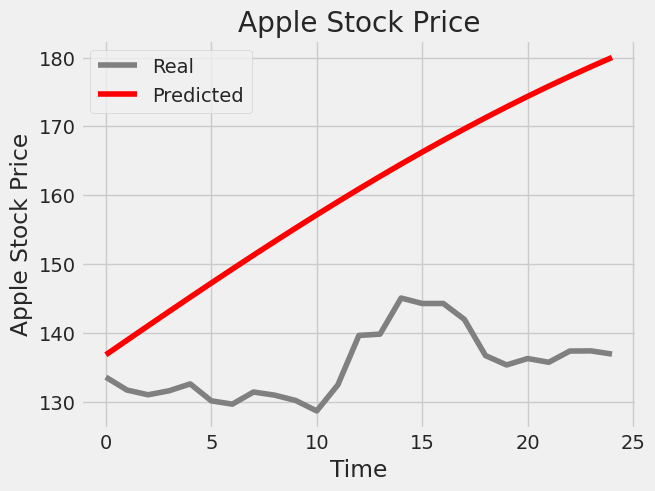

In [39]:
# Plot the actual vs. predicted stock prices for the next 25 time steps
plot_predictions(test_set[:steps_in_future], results, 'Apple Stock Price')

### Analysis of Predicted vs. Real Apple Stock Prices

The plot above displays the **predicted Apple stock prices** (in red) compared to the **real stock prices** (in gray) for the next 25 time steps.

1. **Divergence Between Predicted and Real Prices**:
   - The predicted stock prices show a strong upward trend, increasing steadily over time, while the actual stock prices fluctuate more unpredictably. This indicates a significant discrepancy between the model's predictions and the real market behavior.

2. **Model's Inability to Capture Volatility**:
   - The smooth, upward trend in the predicted values suggests that the model might not be effectively capturing the inherent volatility in stock prices. This is a common challenge in time series prediction, where models sometimes oversimplify future trends, leading to predictions that do not align well with the actual data.

3. **Potential Overfitting or Model Simplicity**:
   - The model's consistent increase in predicted prices could be a result of overfitting to the training data, where the model fails to generalize well to new data. Alternatively, the model might be too simple (e.g., using only a single-layer RNN), which limits its ability to model the complex dynamics of stock prices.


While the model is capturing a general upward trend, it fails to reflect the actual volatility in the stock prices, highlighting the need for further refinement.


### Implementing Long Short-Term Memory (LSTM) Model

#### Understanding the Vanishing Gradient Problem

The **Vanishing Gradient Problem** is a significant challenge in training deep neural networks, particularly Recurrent Neural Networks (RNNs). During the training process, neural networks use backpropagation to adjust the weights of the neurons in the network. However, in deep networks, as the gradient (or error signal) is backpropagated from the output layer to the earlier layers, it tends to diminish exponentially. This means that the updates to the weights in the earlier layers become very small, leading to very slow learning or, in some cases, the network might stop learning altogether.

The problem is more pronounced in RNNs because of their sequential nature, where the gradient needs to propagate through many time steps. As a result, RNNs often struggle to learn long-term dependencies in the data, such as patterns that span over many time steps.

#### Fixing the Vanishing Gradient Problem with LSTMs

**Long Short-Term Memory (LSTM)** networks were designed specifically to address the Vanishing Gradient Problem. LSTMs are a type of RNN architecture that introduces a more complex unit structure, which includes the following components:

- **Cell State**: This is the key to LSTMs’ ability to maintain long-term dependencies. The cell state acts as a conveyor belt, allowing information to flow through the network unchanged. This reduces the risk of the vanishing gradient by preserving gradients over long sequences.
  
- **Gates**: LSTMs use gates to control the flow of information:
  - **Forget Gate**: Decides what information from the cell state should be thrown away.
  - **Input Gate**: Determines what new information should be added to the cell state.
  - **Output Gate**: Decides what part of the cell state should be output as the new hidden state.

These gates are controlled by learned parameters and activation functions, enabling the LSTM to selectively remember or forget information, thereby maintaining the gradient over long sequences and allowing the network to learn long-term dependencies effectively.

By using LSTM units, the model can maintain a memory of important features over extended time periods without suffering from the diminishing gradients that typically hinder standard RNNs.

#### Implementing the LSTM Model

To address the limitations of standard RNNs, an LSTM model is implemented. LSTMs are designed to handle the vanishing gradient problem, allowing them to capture long-term dependencies in time series data.

The model is built with an LSTM layer comprising 125 units, followed by a Dense layer for output. The model is compiled with the RMSprop optimizer and trained for 10 epochs.


In [41]:
# Building the LSTM model
model_lstm= Sequential()
model_lstm.add(Input(shape= (n_steps, features)))
model_lstm.add(LSTM(units= 125))
model_lstm.add(Dense(units= 1))

# Compiling the LSTM model
model_lstm.compile(optimizer= 'RMSprop', loss= 'mse')

# Train the LSTM model
history= model_lstm.fit(X_train, y_train, epochs= 10, batch_size= 32, verbose= 0)

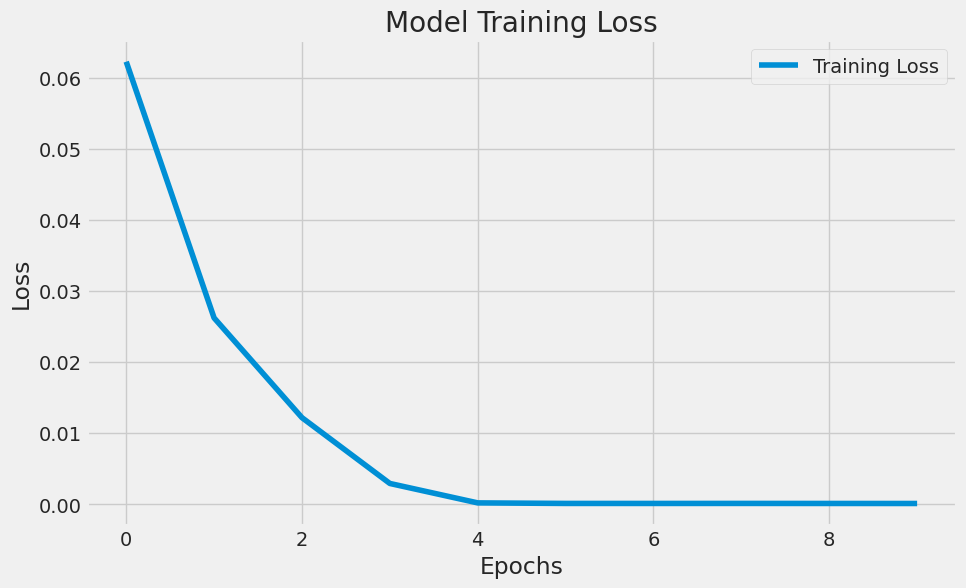

In [42]:
# Plot the training loss
plot_loss(history)

### Analysis of LSTM Model Training Loss

The plot above visualizes the training loss of the LSTM model over 10 epochs. The loss, measured by Mean Squared Error (MSE), decreases significantly during the initial epochs, indicating that the model is rapidly learning to fit the training data.

1. **Rapid Decrease in Loss**:
   - The training loss starts relatively high at around 0.06 and drops sharply within the first 2 epochs. This sharp decline suggests that the model quickly learns the fundamental patterns in the data during the early stages of training.

2. **Convergence**:
   - By the 4th epoch, the loss stabilizes near zero, indicating that the model has successfully minimized the error on the training set. This convergence suggests that the model has learned the underlying patterns in the data well enough to predict the training data with minimal error.

3. **Potential Overfitting Concern**:
   - While the loss convergence is a positive sign, the fact that the loss approaches zero so quickly raises a potential concern for overfitting. This might imply that the model fits the training data too closely, which could hinder its ability to generalize well to unseen data.

In [43]:
# Predicting the stock prices using the trained LSTM model
pred_stock_price= model_lstm.predict(X_test)

# Inverse transform the predicted values to their original scale
pred_stock_price= sc.inverse_transform(pred_stock_price)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


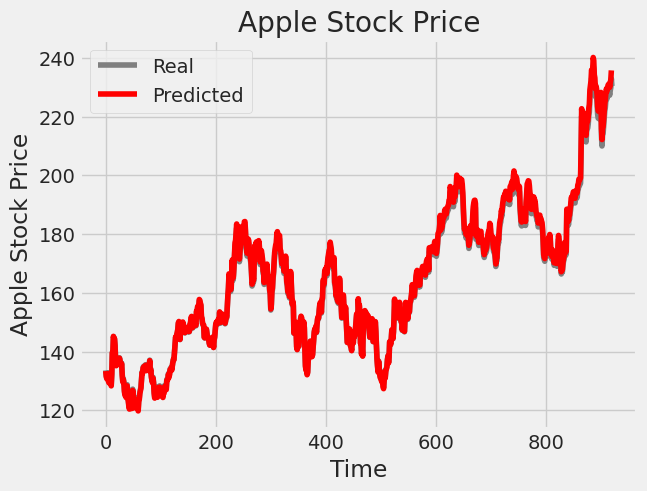

In [44]:
# Plot the predicted vs. real stock price
plot_predictions(test_set, pred_stock_price, 'Apple Stock Price')

### Analysis of LSTM Model Predictions for Apple Stock Prices

The plot above compares the real Apple stock prices (in gray) with the prices predicted by the LSTM model (in red) over the test period.

1. **Alignment with Real Prices**:
   - The predicted stock prices follow the overall trend of the real stock prices reasonably well, particularly in capturing the upward and downward movements over time. This suggests that the LSTM model is effective in learning the underlying patterns in the data.

2. **Smoothing of Predictions**:
   - The predicted curve appears smoother than the actual prices. This smoothing effect indicates that while the LSTM model captures the general direction of price movements, it might struggle with capturing short-term fluctuations or noise in the data. This is a common characteristic of LSTM models, as they are designed to focus on long-term dependencies rather than short-term volatility.

The LSTM model demonstrates a solid ability to predict Apple stock prices, capturing the general trend while smoothing out short-term noise.


### Future Sequence Prediction Using the LSTM Model

To further assess the LSTM model's ability to predict future stock prices, a sequence of future values is generated. This process involves using the last few data points from the test set as input and predicting the subsequent steps in the sequence.



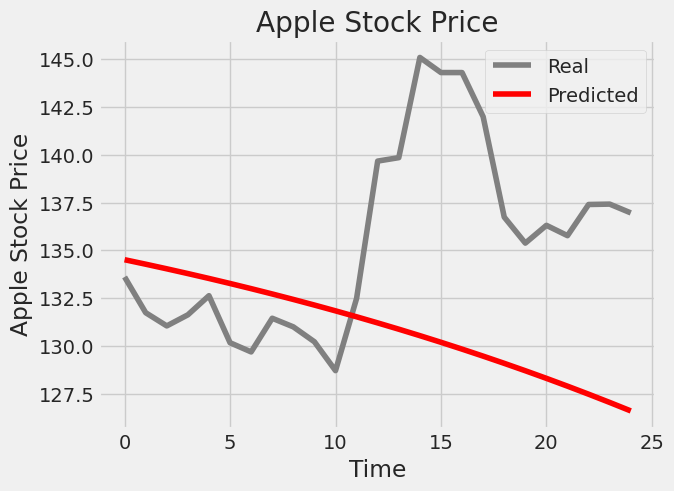

In [45]:
# Generate future predictions using the LSTM model
results= sequence_generation(df, sc, model_lstm, steps_in_future)

# Plot the real vs. the predicted stock prices for the future sequence
plot_predictions(test_set[:steps_in_future], results, 'Apple Stock Price')

### Analysis of LSTM Future Sequence Prediction for Apple Stock Prices

The plot above illustrates the predicted future Apple stock prices (in red) versus the real stock prices (in gray) over a future period of 25 time steps.

1. **Divergence Between Real and Predicted Prices**:
   - The predicted stock prices show a clear downward trend, while the real stock prices exhibit significant volatility, including a sharp increase followed by fluctuations. This divergence suggests that the LSTM model struggles to capture the complex patterns in the data when predicting beyond the range of the training set.

2. **Limitations in Long-Term Forecasting**:
   - The LSTM model's predictions become less reliable as it moves further into the future, as evidenced by the linear decline in the predicted prices. This outcome is common in time series forecasting, where the model relies heavily on the patterns observed in the training data. If the future data behaves differently, the model's predictions may not align well with actual outcomes.

3. **Potential Over-Smoothing**:
   - The smooth, declining trend in the predicted values suggests that the model may be over-smoothing the predictions, failing to account for the potential volatility and rapid changes in the stock prices. This could be due to the inherent limitations of the LSTM architecture in capturing long-term dependencies or a lack of sufficient data variability in the training set.

While the LSTM model performs well in the short-term prediction of stock prices, its ability to predict further into the future appears limited, highlighting the challenges of long-term time series forecasting.


### Multivariate Analysis with Technical Indicators

In the next section, additional technical indicators are introduced to enhance the predictive power of the model. The Relative Strength Index (RSI) and Exponential Moving Averages (EMAs) are calculated and added to the dataset.

- **RSI (Relative Strength Index)**: A momentum oscillator that helps identify overbought or oversold conditions in the stock price.
- **EMA (Exponential Moving Average)**: A type of moving average that places greater weight on more recent data points, making it more responsive to recent price changes.

These indicators are used in conjunction with stock prices to create a multivariate model, potentially improving the model's ability to predict future price movements.



In [57]:
# Define the number of features used in the multivariate model
mv_feats= 6

# Copy the original dataset to a new DataFrame for multivariate analysis
multivariate_df= df.copy()

# Calculate the Relative Strength Index (RSI)
multivariate_df['RSI']= ta.rsi(multivariate_df['Close'], length= 15)

# Calculate the Exponential Moving Averages (EMAs)
multivariate_df['EMAF']= ta.ema(multivariate_df['Close'], lenght= 20)
multivariate_df['EMAM']= ta.ema(multivariate_df['Close'], length= 100)
multivariate_df['EMAS']= ta.ema(multivariate_df['Close'], lenght= 150)

In [47]:
# Create the target labels based on the difference between the adjusted close and the opening price
multivariate_df['Target']= multivariate_df['Adj Close'] - df['Open']

# Shift the target labels to align with the next day's price movement
multivariate_df['Target']= multivariate_df['Target'].shift(-1)

# Drop rows with missing values that resulted from shifting
multivariate_df.dropna(inplace= True)

# Drop unnecessary columns
multivariate_df.drop(['Volume', 'Close'], axis= 1, inplace= True)

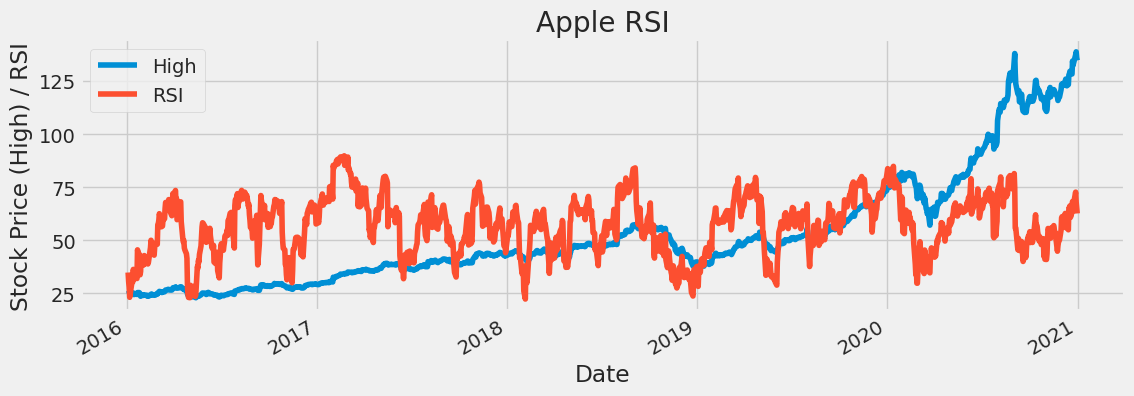

In [51]:
# Plot the RSI and High values to visualize the relationship
multivariate_df.loc[f'{tstart}':f'{tend}', ['High', 'RSI']].plot(figsize= (12,4), legend= True)
plt.xlabel('Date')
plt.ylabel('Stock Price (High) / RSI')
plt.title('Apple RSI')
plt.show()

### Analysis of the RSI and Stock Price Plot

The plot illustrates the relationship between Apple's stock price (specifically the "High" price) and the Relative Strength Index (RSI) over time, spanning from 2016 to 2021. The stock price is shown in blue, while the RSI is depicted in red.

- **Stock Price (High):** The blue line indicates the daily high prices of Apple's stock. Throughout the period, there is a noticeable upward trend, reflecting Apple's growth and the increasing value of its stock.

- **Relative Strength Index (RSI):** The red line represents the RSI, a momentum indicator used to measure the speed and change of price movements. The RSI oscillates between 0 and 100, with values above 70 often indicating that the stock is overbought, while values below 30 suggest it is oversold.

- **Correlation Insight:** The plot suggests a correlation between the RSI and the stock price. When the RSI nears the overbought threshold, the stock price tends to reach a peak. Conversely, when the RSI approaches the oversold threshold, the stock price often dips. This correlation can be particularly useful for momentum-based trading strategies.

This visualization provides insights into how the RSI may be leveraged to predict or analyze future stock price movements, highlighting the relationship between price momentum and market behavior.


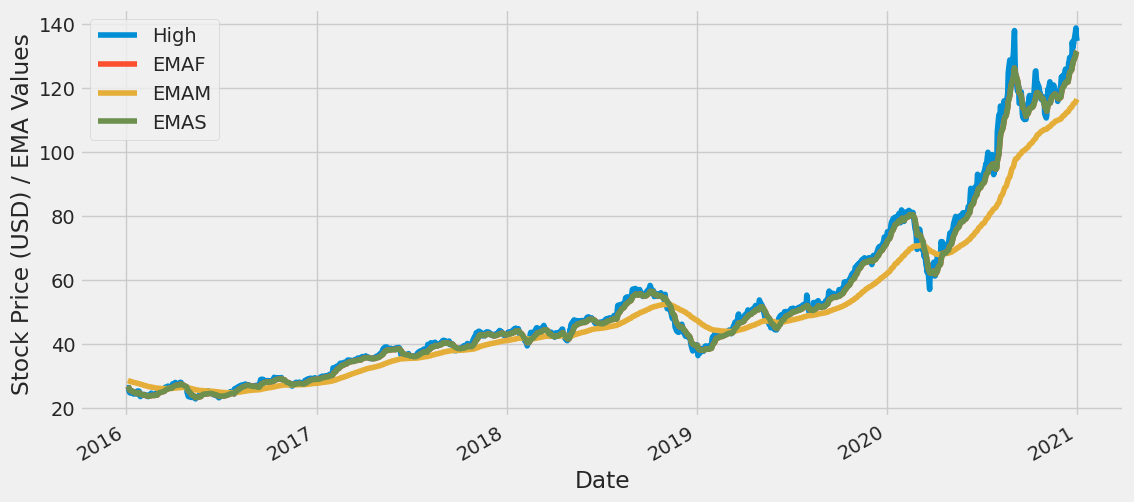

In [54]:
# Plot the High values along with EMAs to visualize the relationship
multivariate_df.loc[f'{tstart}':f'{tend}', ['High', 'EMAF', 'EMAM', 'EMAS']].plot(figsize= (12,6), legend= True)
plt.xlabel('Date')
plt.ylabel('Stock Price (USD) / EMA Values')
plt.show()

### Analysis of Apple Stock Price and Exponential Moving Averages (EMA)

The plot above illustrates the relationship between Apple's stock price (High) and three different Exponential Moving Averages (EMAF, EMAM, and EMAS) over time. The Exponential Moving Averages are technical indicators that give more weight to recent price data, making them responsive to recent changes in the stock's price.

- **EMAF (20-day EMA):** The fastest-moving average, responding quickly to price changes. This is often used by traders to capture short-term trends.
- **EMAM (100-day EMA):** A medium-term moving average, which provides a balanced view of price trends, smoothing out short-term fluctuations while still being responsive to market movements.
- **EMAS (150-day EMA):** The slowest moving average, which smooths out price data over a longer period, making it useful for identifying long-term trends.

From the plot, it can be observed that the stock price generally follows the trend set by these EMAs, with EMAF being the most volatile and EMAS being the most stable. As the stock price increases, all EMAs trend upwards, with EMAF leading the way due to its higher sensitivity to price changes.

These EMAs can serve as potential support levels during upward trends or resistance levels during downward trends. Traders often use the crossovers between these EMAs as signals to buy or sell, with faster EMAs crossing above slower ones indicating a potential upward trend, and vice versa.

The EMAs provide a comprehensive view of the stock's trend over various time frames, helping in making informed trading decisions.


In [55]:
# Define the feature columns and the label column
feat_cols= ['Open', 'High', 'RSI', 'EMAF', 'EMAM', 'EMAS']
label_col= ['Target']

In [56]:
# Split the data into training and test sets
mv_training_set, mv_test_set= train_test_split(multivariate_df, tstart, tend, feat_cols + label_col)

# Separate features and labels for both training and test sets
X_train= mv_training_set[:, :-1]
y_train= mv_training_set[:, -1]

X_test= mv_test_set[:, :-1]
y_test= mv_test_set[:, -1]

In [58]:
# Scale the features between 0 and 1
mv_sc= MinMaxScaler(feature_range= (0,1))

# Reshape and scale the training and test feature sets
X_train= mv_sc.fit_transform(X_train).reshape(-1, 1, mv_feats)
X_test= mv_sc.fit_transform(X_test).reshape(-1, 1, mv_feats)

In [60]:
# Initialize the LSTM model
mv_model= Sequential()
mv_model.add(Input(shape= (1, mv_feats)))
mv_model.add(LSTM(units= 125))
mv_model.add(Dense(units= 1))

# Compile the model with RMSprop optimizer and Mean Squared Error (MSE) loss
mv_model.compile(optimizer= 'RMSprop', loss= 'mse')

# Train the model
history= mv_model.fit(X_train, y_train, epochs= 20, batch_size= 32, verbose= 0)

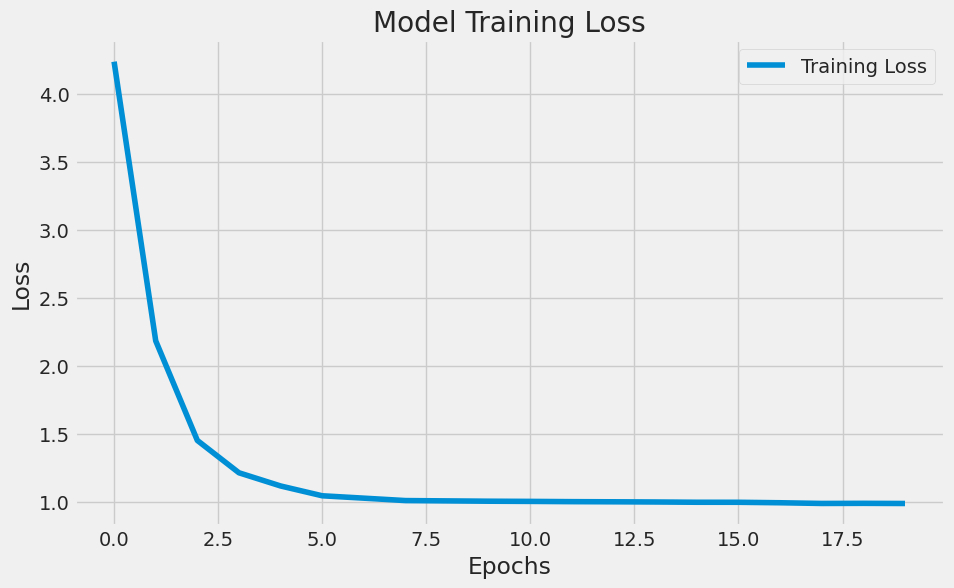

In [61]:
# Plot the training loss
plot_loss(history)

### Analysis of Model Training Loss

The plot above illustrates the training loss of the LSTM model over 20 epochs.

Initially, the model experiences a significant reduction in loss, particularly during the first few epochs. This steep decline indicates that the model is quickly learning and improving its predictions during the early stages of training.

As the epochs progress, the loss curve begins to flatten out, suggesting that the model is approaching a state of convergence. By the 10th epoch, the loss stabilizes, indicating that additional training is yielding diminishing returns in terms of further loss reduction.

This pattern of rapid initial learning followed by convergence is typical of well-functioning models, reflecting an effective optimization process. However, to evaluate the model's performance thoroughly, it is essential to assess its performance on unseen test data, which will help determine whether the model has generalized well to new inputs.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


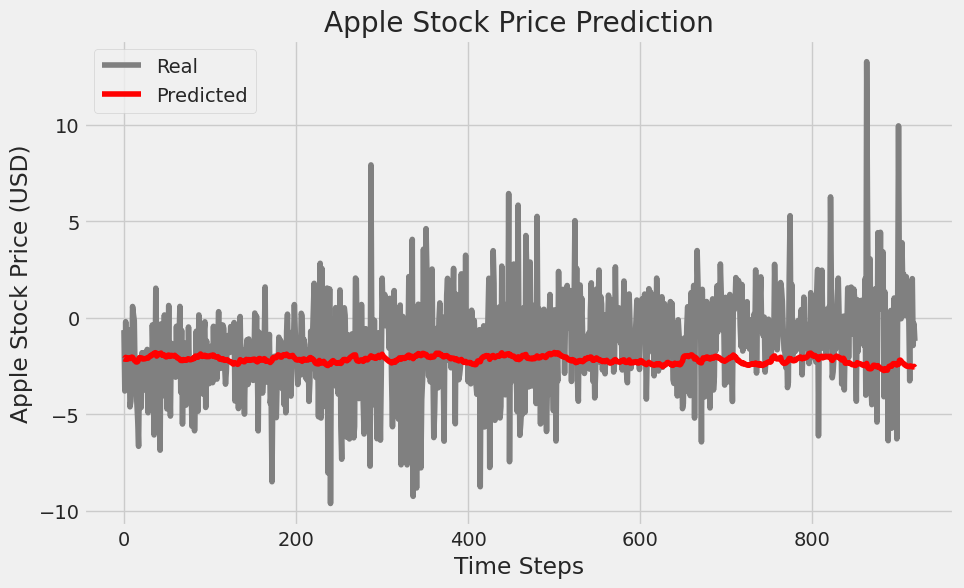

In [65]:
# Generate predictions on the test set
preds= mv_model.predict(X_test)

# Plot real vs. predicted values for Apple stock price. 'y_test' represents the true values
plt.figure(figsize= (10,6))
plt.plot(y_test, color= 'gray', label= 'Real')
plt.plot(preds, color= 'red', label= 'Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Apple Stock Price (USD)')
plt.title('Apple Stock Price Prediction')
plt.legend(loc= 'best')
plt.show()

### Analysis of the Apple Stock Price Prediction Plot

This plot presents a comparison between the actual Apple stock prices (depicted in gray) and the predicted values (shown in red) over the test set. Just for clarity, the x-axis represents sequential time steps rather than specific dates, highlighting the progression of predictions over time.

The predicted stock prices appear relatively stable, with minimal fluctuation, in contrast to the actual prices, which exhibit significant volatility. This discrepancy suggests that the model struggles to accurately capture the true variability of the stock prices. The model's predictions tend to hover around a central value, failing to account for the more extreme highs and lows observed in the actual data.

This behavior may indicate limitations in the model's ability to learn and predict the complex patterns inherent in stock market data. Despite using an LSTM model trained on multivariate input, the model might require more data or additional feature engineering to improve its predictive capabilities.

The use of time steps on the x-axis clarifies that the plot represents sequential predictions over time, rather than being tied to specific calendar dates. This emphasizes the model's focus on forecasting stock price movements as a sequence, which is crucial in understanding how predictions evolve with each step.


### Conclusion

This notebook has focused on developing and evaluating models to predict Apple Inc.'s stock prices using time series data. Beginning with a basic Recurrent Neural Network (RNN) and progressing to more advanced Long Short-Term Memory (LSTM) networks, the models demonstrated varying degrees of success in capturing historical patterns in stock prices.

The LSTM model, in particular, proved capable of learning sequential patterns and addressing some of the challenges posed by the vanishing gradient problem that typically hinders standard RNNs. However, despite its strengths, the model's predictions remained limited in their ability to accurately reflect the real-world volatility and sudden fluctuations in stock prices. This limitation highlights the inherent difficulty of stock price prediction, a task that is influenced by a vast array of complex, non-linear factors.

### The Challenge of Predicting Stock Prices

Predicting stock prices is an exceedingly challenging endeavor in the field of finance, primarily due to the dynamic and multifaceted nature of the market. While historical price data and technical indicators such as the Relative Strength Index (RSI) and Exponential Moving Averages (EMA) provide valuable insights, they are only a small part of the puzzle. Stock prices are also heavily influenced by numerous external factors, many of which are difficult, if not impossible, to quantify or predict using numerical models alone.

#### Factors Influencing Stock Prices Beyond Historical Data

1. **Macroeconomic Indicators**: Broader economic conditions, such as interest rates, inflation, GDP growth, and unemployment rates, play a significant role in shaping investor sentiment and, consequently, stock prices. For example, an unexpected rise in interest rates can lead to a sell-off in equities as investors move their capital to higher-yielding, lower-risk investments.

2. **Company-Specific News**: Events such as earnings reports, product launches, changes in executive leadership, and mergers or acquisitions can drastically impact a company's stock price. Positive news, like higher-than-expected earnings, can drive stock prices up, while negative news, such as a product recall, can cause prices to plummet.

3. **Market Sentiment and Speculation**: Market sentiment, often driven by investor psychology, can lead to significant price movements that may not be directly related to a company's fundamentals. Speculative trading, influenced by trends, rumors, or irrational exuberance, can cause sharp spikes or drops in stock prices.

4. **Geopolitical Events**: Global events such as political instability, trade wars, or natural disasters can introduce uncertainty into the markets, leading to increased volatility. Such events are typically unpredictable and can have a profound impact on stock prices across various sectors.

5. **Technological Innovations and Industry Disruptions**: In sectors heavily influenced by technology, such as the tech industry itself, rapid advancements or disruptive innovations can lead to significant changes in stock valuations. Companies that fail to adapt to new technologies may see their stock prices decline, while those leading innovation can experience rapid growth.

### Conclusion

While models like LSTM can provide valuable insights into trends and potential future movements, they are inherently limited by the complexities and unpredictabilities of the real world. Effective stock price prediction requires not only sophisticated models but also a comprehensive understanding of the broader economic, political, and social landscape. Investors and analysts must, therefore, consider a wide range of factors, both quantitative and qualitative, when making predictions or investment decisions.

In conclusion, predicting stock prices remains a challenging and intricate task. It involves navigating an environment influenced by countless variables, many of which extend beyond mere numbers. As such, while models provide a useful tool for analysis, they must be used in conjunction with broader market knowledge and strategic insight.
